In [1]:
""" required packages to run model """
import pandas as pd  # for manipulating dataframes
from datetime import datetime # for converting date and time
from sklearn.preprocessing import LabelEncoder  # encoding data
from sklearn.model_selection import train_test_split  # splitting data
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler  # scaling data between 2 values
from sklearn.feature_selection import SelectKBest, f_classif  # feature engineering models
from xgboost import XGBClassifier
from sklearn.metrics import classification_report  # for evaluating results
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt  # plotting data
import seaborn as sns  # plotting data


""" read train data """
train_data = pd.read_csv("Train.csv")
""" exploring train data """
train_data.shape  # shape of train data (how many lines and columns)


(2100, 27)

In [2]:
train_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

train_data.describe()


,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
count,2.100000e+03,2.100000e+03,2100.0,2100.000000,1.488000e+03,1488.000000,1488.000000,1488.000000
mean,5.302947e+04,-5.291354e+04,256.0,0.708571,1.182725e+04,0.731855,0.982527,0.119624
std,1.539498e+05,1.539653e+05,0.0,0.454529,7.666506e+04,0.443143,0.131070,0.324630
min,1.000000e+02,-2.500000e+06,256.0,0.000000,5.000000e+01,0.000000,0.000000,0.000000
25%,1.000000e+03,-1.200000e+04,256.0,0.000000,1.113750e+03,0.000000,1.000000,0.000000
50%,3.500000e+03,-3.500000e+03,256.0,1.000000,2.800000e+03,1.000000,1.000000,0.000000
75%,1.200000e+04,-1.000000e+03,256.0,1.000000,1.050000e+04,1.000000,1.000000,0.000000
max,2.500000e+06,-1.000000e+02,256.0,1.000000,2.760000e+06,1.000000,1.000000,1.000000


In [4]:
""" read test data """
test_data_for_csv = pd.read_csv("Test.csv")
test_data = pd.read_csv("Test.csv")
""" exploring test data """
test_data.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'LoanId',
       'InvestorId', 'LoanApplicationId', 'ThirdPartyId'],
      dtype='object')

In [5]:
test_data.shape

(905, 19)

In [6]:
test_data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,LoanId,InvestorId,LoanApplicationId,ThirdPartyId
0,CustomerId_310,3/31/2019 13:33,14000.0,-14000.0,TransactionId_925,BatchId_1144,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 13:33,LoanId_1027,InvestorId_1,LoanApplicationId_825,ThirdPartyId_1175
1,CustomerId_243,3/31/2019 15:04,1000.0,-1000.0,TransactionId_1080,BatchId_1214,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_8,data_bundles,ChannelId_1,1,3/31/2019 15:04,LoanId_768,InvestorId_1,LoanApplicationId_68,ThirdPartyId_604
2,CustomerId_142,3/31/2019 17:31,2500.0,-2500.0,TransactionId_2315,BatchId_2150,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:31,LoanId_1067,InvestorId_1,LoanApplicationId_1223,ThirdPartyId_1521
3,CustomerId_142,3/31/2019 17:32,500.0,-500.0,TransactionId_1466,BatchId_1071,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:32,LoanId_202,InvestorId_1,LoanApplicationId_633,ThirdPartyId_406
4,CustomerId_142,3/31/2019 17:34,1000.0,-1000.0,TransactionId_337,BatchId_2477,SubscriptionId_7,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,3/31/2019 17:34,LoanId_533,InvestorId_1,LoanApplicationId_309,ThirdPartyId_302


In [7]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows',3000)

In [8]:
train_data#.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStatus,IssuedDateLoan,AmountLoan,Currency,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,9/21/2018 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,9/25/2018 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,9/25/2018 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,9/27/2018 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,9/27/2018 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CustomerId_27,9/28/2018 12:40,500.0,-500.0,TransactionId_930,BatchId_357,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CustomerId_27,10/3/2018 9:34,500.0,-500.0,TransactionId_1381,BatchId_8,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CustomerId_27,10/17/2018 9:06,1235.0,-1235.0,TransactionId_255,BatchId_1082,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CustomerId_27,10/17/2018 12:02,1235.0,-1235.0,TransactionId_543,BatchId_1195,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_3,airtime,ChannelId_1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CustomerId_258,10/18/2018 16:11,10000.0,-10000.0,TransactionId_1041,BatchId_1970,SubscriptionId_4,UGX,256,ProviderId_1,ProductId_7,airtime,ChannelId_1,1,10/18/2018 16:11,10016.0,UGX,LoanId_62,10/22/2018 9:13,1.0,InvestorId_3,11/17/2018 16:11,NaN,PayBackId_1791,ThirdPartyId_648,0.0,0.0


In [9]:
train_data.nunique()

CustomerId                421
TransactionStartTime     1606
Value                      98
Amount                     77
TransactionId            1758
BatchId                  1713
SubscriptionId              6
CurrencyCode                1
CountryCode                 1
ProviderId                  1
ProductId                  16
ProductCategory             7
ChannelId                   1
TransactionStatus           2
IssuedDateLoan           1101
AmountLoan                647
Currency                    1
LoanId                   1159
PaidOnDate               1427
IsFinalPayBack              2
InvestorId                  3
DueDate                  1101
LoanApplicationId        1156
PayBackId                1485
ThirdPartyId             1481
IsThirdPartyConfirmed       2
IsDefaulted                 2
dtype: int64

In [10]:
""" dropping unecessaary rows (NAN ) and columns (see below)
 We've decided to drop these columns after some feature engineering steps 
 uniqueid is unecessary from the start
"""
train_data = train_data.dropna()


In [11]:
#Convert TransactionStartTime in datetime and separate day/month/year/minute/second
#train_data['TransactionStartTime'] =  pd.to_datetime(train_data['TransactionStartTime'])
#train_data['TransactionStartTime_day'] = train_data['TransactionStartTime'].dt.day
#train_data['TransactionStartTime_month'] = train_data['TransactionStartTime'].dt.month
#train_data['TransactionStartTime_year'] = train_data['TransactionStartTime'].dt.year
#train_data['TransactionStartTime_minute'] = train_data['TransactionStartTime'].dt.minute
#train_data['TransactionStartTime_hour'] = train_data['TransactionStartTime'].dt.hour

#train_data['TransactionStartTime']

In [12]:
train_data.nunique()

CustomerId                238
TransactionStartTime     1095
Value                      85
Amount                     69
TransactionId            1149
BatchId                  1122
SubscriptionId              5
CurrencyCode                1
CountryCode                 1
ProviderId                  1
ProductId                  15
ProductCategory             7
ChannelId                   1
TransactionStatus           1
IssuedDateLoan           1098
AmountLoan                641
Currency                    1
LoanId                   1153
PaidOnDate               1418
IsFinalPayBack              2
InvestorId                  3
DueDate                  1098
LoanApplicationId        1153
PayBackId                1476
ThirdPartyId             1474
IsThirdPartyConfirmed       2
IsDefaulted                 2
dtype: int64

In [13]:
train_data = train_data.drop(['CurrencyCode','CountryCode','ProviderId','ChannelId','TransactionStatus','CustomerId'
                              ,'TransactionId','BatchId','SubscriptionId','ProviderId','ChannelId','TransactionStatus','Currency','LoanId','InvestorId'
                              ,'LoanApplicationId','ThirdPartyId'], axis=1)  # axis = 1 to drop columns not lines
train_data.shape

(1479, 13)

In [14]:
test_data.columns

test_data = test_data.drop(['CustomerId','TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
                            'CountryCode','ProviderId','ChannelId','TransactionStatus','LoanId',
                            'InvestorId', 'LoanApplicationId', 'ThirdPartyId'], axis=1)
test_data.shape

(905, 6)

In [15]:
train_data.columns

Index(['TransactionStartTime', 'Value', 'Amount', 'ProductId',
       'ProductCategory', 'IssuedDateLoan', 'AmountLoan', 'PaidOnDate',
       'IsFinalPayBack', 'DueDate', 'PayBackId', 'IsThirdPartyConfirmed',
       'IsDefaulted'],
      dtype='object')

In [16]:
test_data.columns

Index(['TransactionStartTime', 'Value', 'Amount', 'ProductId',
       'ProductCategory', 'IssuedDateLoan'],
      dtype='object')

In [17]:

""" get list of categorical features """
categorical_features = ['ProductId','ProductCategory']
#['TransactionStartTime','IssuedDateLoan','PaidOnDate','DueDate']

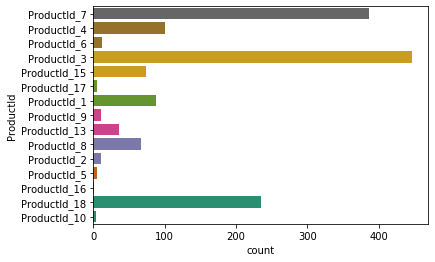

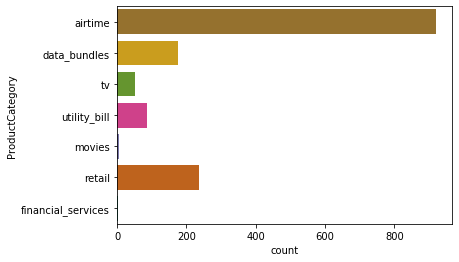

C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


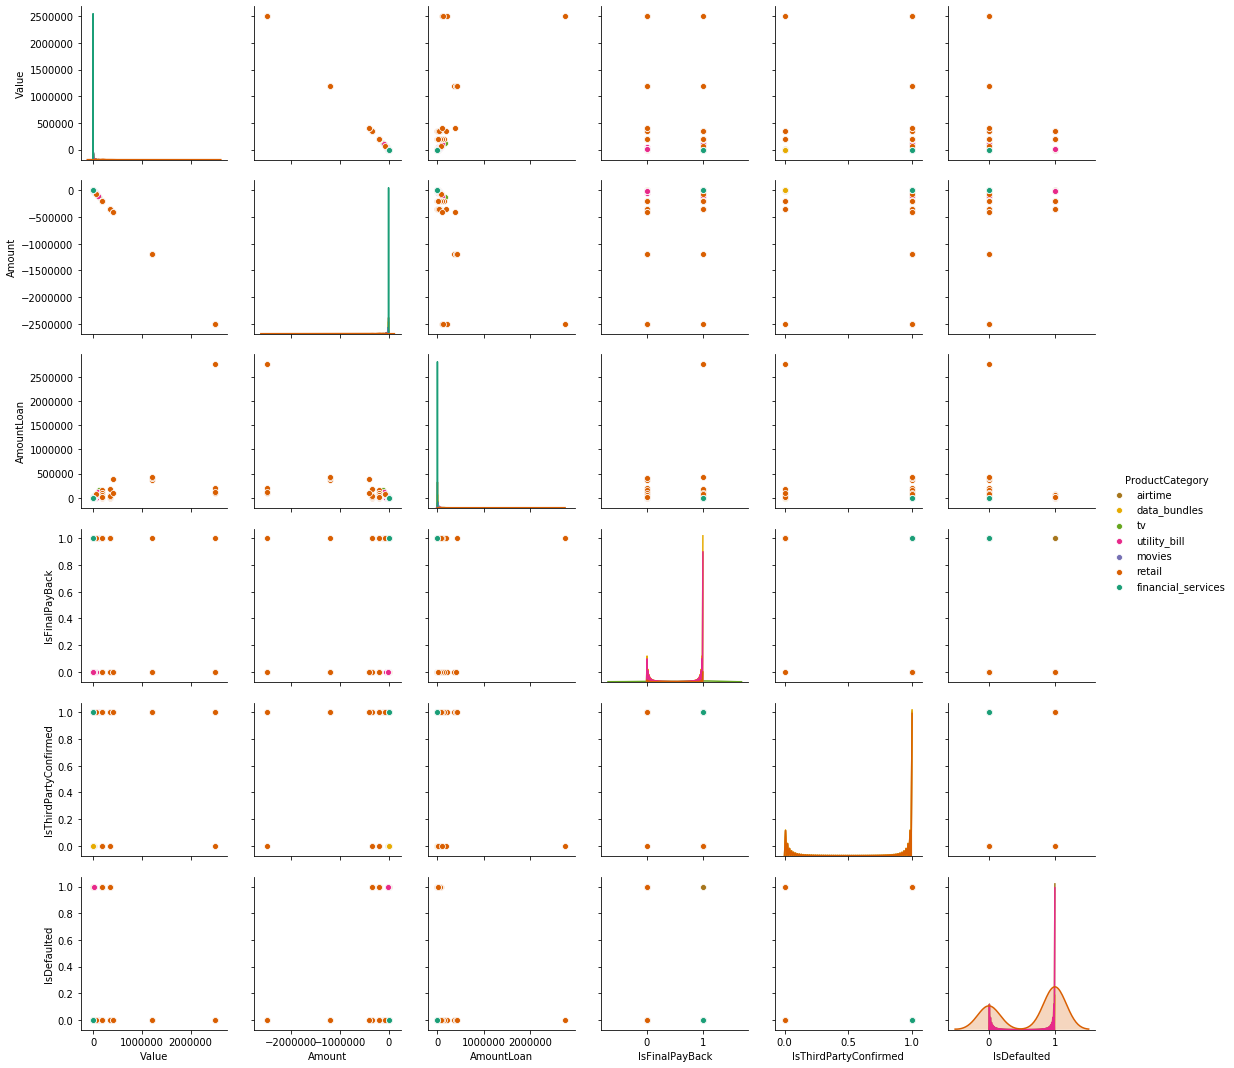

In [18]:

""" plot categorical features """
#ROWS, COLS = 1, 2
#fig, ax = plt.subplots(ROWS, COLS, figsize=(11, 10))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    #if col == COLS:
    #    row += 1
    #col = i % COLS
    #train_data[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)
    m = sns.countplot(data=train_data, y = categorical_feature, palette='Dark2_r', orient = 'v')#.set_title(categorical_feature)
    plt.show()

sns.pairplot(data=train_data, hue = categorical_feature, palette='Dark2_r')
plt.show()


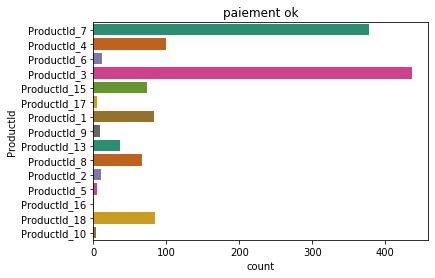

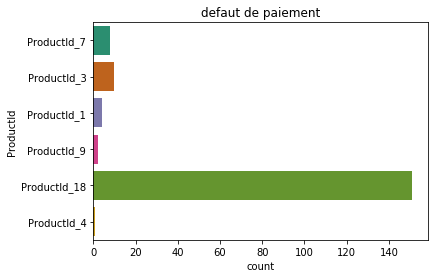

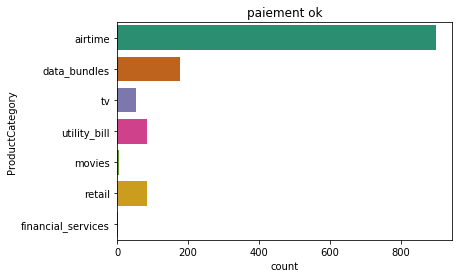

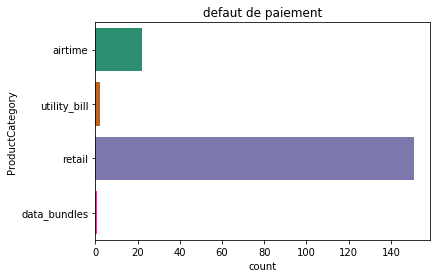

In [19]:
""" plot categorical features with the target variable """  # Men are more likely to have bank account than women
for feature in categorical_features:

    #fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    #train_data[train_data.IsDefaulted == 1][feature].value_counts().plot(kind="bar", ax=ax[0]).set_title("defaut de paiement")
    #train_data[train_data.IsDefaulted == 0][feature].value_counts().plot(kind="bar", ax=ax[1]).set_title("paiement ok")
    m = sns.countplot(data=train_data[train_data.IsDefaulted == 0], y = feature, palette='Dark2', orient = 'v').set_title("paiement ok")
    plt.show()
    m = sns.countplot(data=train_data[train_data.IsDefaulted == 1], y = feature, palette='Dark2', orient = 'v').set_title("defaut de paiement")
    plt.show()



In [20]:
""" plot numerical features """
train_data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 15 to 2099
Data columns (total 13 columns):
TransactionStartTime     1479 non-null object
Value                    1479 non-null float64
Amount                   1479 non-null float64
ProductId                1479 non-null object
ProductCategory          1479 non-null object
IssuedDateLoan           1479 non-null object
AmountLoan               1479 non-null float64
PaidOnDate               1479 non-null object
IsFinalPayBack           1479 non-null float64
DueDate                  1479 non-null object
PayBackId                1479 non-null object
IsThirdPartyConfirmed    1479 non-null float64
IsDefaulted              1479 non-null float64
dtypes: float64(6), object(7)
memory usage: 201.8+ KB


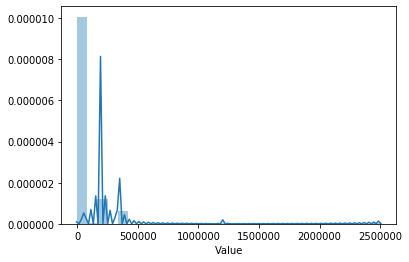

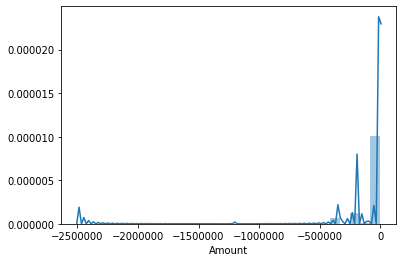

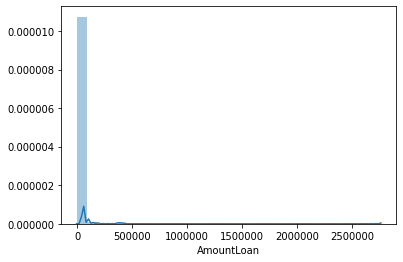

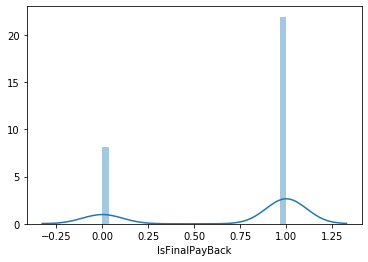

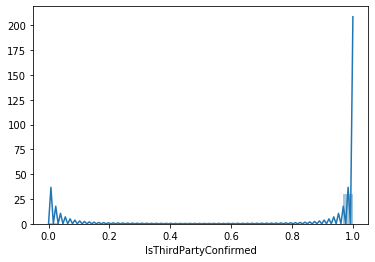

In [21]:
numerical_features = ['Value', 'Amount','AmountLoan','IsFinalPayBack','IsThirdPartyConfirmed']
#train_data[numerical_features].describe()
#train_data[numerical_features].hist(bins=30, figsize=(15, 10))
for features in numerical_features:
    
    m = sns.distplot(train_data[features],bins=30)

    plt.show()


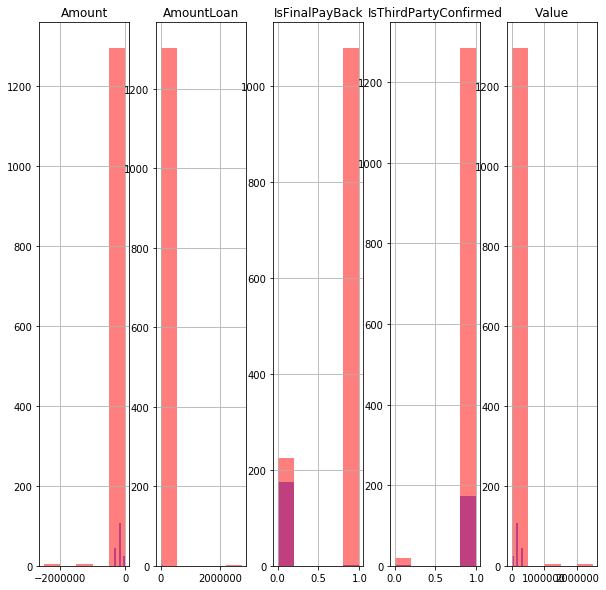

In [22]:
""" plot numerical features with the target variable """
fig, ax = plt.subplots(1, 5, figsize=(10, 10))
train_data[train_data.IsDefaulted == 1][numerical_features].hist(bins=5, color="blue", alpha=0.5, ax=ax)
train_data[train_data.IsDefaulted == 0][numerical_features].hist(bins=5, color="red", alpha=0.5, ax=ax)
plt.show()



In [23]:
""" Separate the target variable and rest of the variables """
X = train_data.drop(['Amount','IsDefaulted'], axis=1)
Y = train_data.IsDefaulted

""" label encoding target variable (binary classification) """
# 1 means have bank_account, 0 means does not have bank_account
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
X.shape
""" One hot encoding of other categorical variables """
X = pd.get_dummies(X)
X.shape



(1479, 6211)

In [25]:
test_data = pd.get_dummies(test_data)

In [26]:
test_data.shape

(905, 1382)

In [27]:
10086/23524

0.42875361333106615

In [28]:
""" scaling features to [0,1] interval """
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

test_data = scaler.fit_transform(test_data)

In [29]:
""" feature engineering/selection """

bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
print("df scores :", dfscores)
dfcolumns = pd.DataFrame(pd.DataFrame(X).columns)
print(dfcolumns)
print(type(dfcolumns))

df scores :                0
0     182.716697
1       0.976332
2     830.608519
3       0.114576
4       0.134994
...          ...
6206    0.134994
6207    0.134994
6208    0.134994
6209    0.134994
6210    0.134994

[6211 rows x 1 columns]
         0
0        0
1        1
2        2
3        3
4        4
...    ...
6206  6206
6207  6207
6208  6208
6209  6209
6210  6210

[6211 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [30]:
""" concat two dataframes for better visualization """
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

featureScores


,0,0
0,0,182.716697
1,1,0.976332
2,2,830.608519
3,3,0.114576
4,4,0.134994
...,...,...
6206,6206,0.134994
6207,6207,0.134994
6208,6208,0.134994
6209,6209,0.134994


In [31]:
train_data.shape


(1479, 13)

In [32]:
X.shape

(1479, 6211)

In [33]:
""" split the data into train and test data """
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('X_train shape : ',X_train.shape)
print('y_test shape : ',y_test.shape)
print('X_test shape : ',X_test.shape)
print('test_data shape : ',test_data.shape)



X_train shape :  (1183, 6211)
y_test shape :  (296,)
X_test shape :  (296, 6211)
test_data shape :  (905, 1382)


In [34]:
""" applying XGBoost algorithm """
xgb = XGBClassifier(max_depth=10)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(" xgboost on train set : {:.2f}%".format((acc_train*100)))
print(" xgboost on test set : {:.2f}%".format((acc_test*100)))

 xgboost on train set : 98.22%
 xgboost on test set : 97.30%


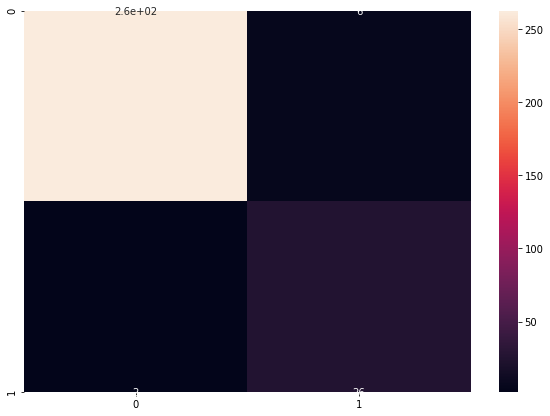

Confusion Matrix :  [[262   6]
 [  2  26]]


In [35]:
""" plotting confusion matrix """
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()
print("Confusion Matrix : ", cm)

In [36]:
predictions = pd.DataFrame(y_pred_test)
predictions[0].value_counts()


0    264
1     32
Name: 0, dtype: int64

In [37]:
predictions

,0
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [38]:
prediction_true = pd.DataFrame(y_test)
prediction_true[0].value_counts()

0    268
1     28
Name: 0, dtype: int64

In [39]:
test_data.shape
print("classification report : \n ", classification_report(y_test, y_pred_test))

classification report : 
                precision    recall  f1-score   support

           0       0.99      0.98      0.98       268
           1       0.81      0.93      0.87        28

    accuracy                           0.97       296
   macro avg       0.90      0.95      0.93       296
weighted avg       0.98      0.97      0.97       296



In [40]:
my_list = ['apple', 'banana', 'grapes', 'pear']
for c, value in enumerate(my_list):
    print(c, value)

0 apple
1 banana
2 grapes
3 pear
